# Sampling Distributions

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling-Distributions" data-toc-modified-id="Sampling-Distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling Distributions</a></span></li><li><span><a href="#Sampling-Distribution-of-Sample-Proportions" data-toc-modified-id="Sampling-Distribution-of-Sample-Proportions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sampling Distribution of Sample Proportions</a></span><ul class="toc-item"><li><span><a href="#Gumballs" data-toc-modified-id="Gumballs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gumballs</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Statistical-Outcomes:" data-toc-modified-id="Statistical-Outcomes:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Statistical Outcomes:</a></span></li><li><span><a href="#Notations-and-Conditions" data-toc-modified-id="Notations-and-Conditions-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Notations and Conditions</a></span></li><li><span><a href="#Visual-Summary" data-toc-modified-id="Visual-Summary-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Visual Summary</a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examples</a></span></li></ul></li><li><span><a href="#Sampling-Distribution-of-Sample-Means" data-toc-modified-id="Sampling-Distribution-of-Sample-Means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sampling Distribution of Sample Means</a></span><ul class="toc-item"><li><span><a href="#Temperature" data-toc-modified-id="Temperature-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Temperature</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Statistical-Outcomes:" data-toc-modified-id="Statistical-Outcomes:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Statistical Outcomes:</a></span></li><li><span><a href="#Notations-and-Conditions" data-toc-modified-id="Notations-and-Conditions-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Notations and Conditions</a></span></li><li><span><a href="#Visual-Summary" data-toc-modified-id="Visual-Summary-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Visual Summary</a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Examples</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Wish-to-do" data-toc-modified-id="Wish-to-do-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wish to do</a></span></li></ul></div>

# Sampling Distribution of Sample Proportions 

This typically applies to case where the variable under study is categorical. For eg, a _population_ of gumballs, where 60% of them are yellow balls.  

## Gumballs

### Setup

**Bernoulli:**

Let Y be the random variable of picking up a gumball out of say 10000 balls which is our population $T$. 60% of those balls are yellow and rest other colors.  

Our population would thus look like this (1 indicating yellow, 0 indicating other colors):  
$[1,0,0,0,1,1,0,1,0,1,1,0,0,0,1, \cdots ,1]$

$
Y = 
\begin{cases}
1 \ \ \text{if ball picked up is yellow} \\
0 \ \ \text{if not}
\end{cases}
$

Then, the mean and variance of $Y$ van be calculated as below [Proof here](https://www.statlect.com/probability-distributions/Bernoulli-distribution)  

$
\mu_y = p  \ \ \ \ \sigma_y^2 = pq
$  
where, $p$ is probability of picking up yellow ball, and $q$, other balls.  

Suppose, again by some Godly means, we know, $p = 0.6$ then  

$
\mu_y = p = 0.6 \ \ \ \ \sigma_y^2 = pq = (0.6)(0.4) = 0.24  
$

$$
\color {blue}{ \mu = \mu_y = p = 0.6 \\ \sigma^2 = \sigma_y^2 = pq = 0.24 \\ \sigma = \sigma_y = \sqrt{0.24} = 0.4898 } \tag{1}
$$

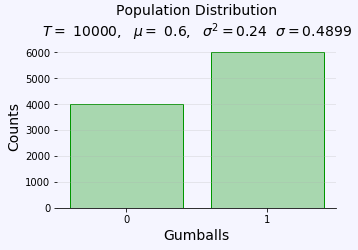

In [70]:
%matplotlib inline

from random import shuffle 
import matplotlib.pyplot as plt
from SDSPSM import get_metrics, drawBarGraph

T = 10000  # total size of population
p = 0.6    # 60% has yellow balls

y_freq = int(p*T)                 
y_pops = [1]*y_freq        
o_freq = int((1-p)*T)
o_pops = [0]*o_freq
population = y_pops + o_pops
population_freq = [o_freq, y_freq]
shuffle(population)    

# population metrics
mu, var, sigma = get_metrics(population)

#visualize
backgroundColour = '#F5F5FF'
fig, (ax1) = plt.subplots(1,1, figsize=(5,3), facecolor=backgroundColour)
drawBarGraph(population_freq, ax1, [T, mu, var, sigma], 'Population Distribution','Gumballs', 'Counts',xmin=0)


ax1.set_facecolor(backgroundColour)
# fig.patch.set_facecolor(backgroundColour)
plt.show()

A rough visualization of distribution, density (so total height of bars equal 1), and probability mass function of our current population

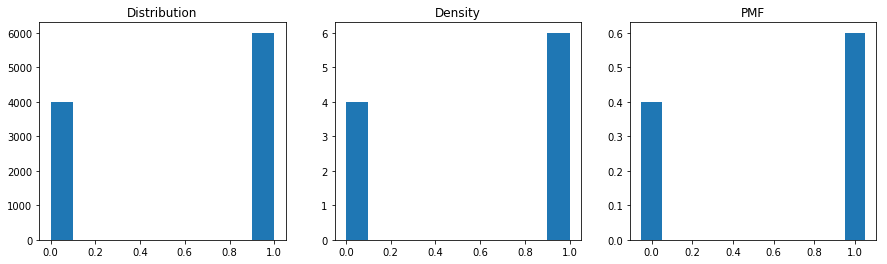

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

def mini_plot_SDSP(raw_list, norm_off=False, width=0.1): 

    ax1.hist(raw_list) 
    ax1.set_title('Distribution')
    
    _, bins,_ = ax2.hist(raw_list, density=True) 
    ax2.set_title('Density')
    
    # probability mass
    dummy_dict = {i:raw_list.count(i) for i in raw_list}
    total = sum(list(dummy_dict.values()))
    pmf = {key: round(val/total,4) for key, val in dummy_dict.items()}
    ax3.bar(list(pmf.keys()), list(pmf.values()), width=width)
    ax3.set_title('PMF')
    
    # normal approx overlay if needed
    if norm_off == False:  # so user wants normal curve overlay
        mu, var, sigma = get_metrics(raw_list)
        import numpy as np
        X = np.linspace(min(bins),max(bins),10*len(bins))
        from math import sqrt, pi
        Cp = 1/(sigma*sqrt(2*pi))
        Ep = -1/2*((X-mu)/sigma)**2
        G = Cp*np.exp(Ep)    
        metrics_text = '$\mu_x:{}$ \n$\sigma_x:{}$'.format(mu, sigma)
        ax2.text(0.97, 0.98,metrics_text,ha='right', va='top',transform = ax2.transAxes,fontsize=10,color='red')    
        ax2.plot(X, G, color='red')      


mini_plot_SDSP(population, norm_off=True)
plt.show()

### Statistical Outcomes: 

>Let us randomly sample from the population. One trial/experiment is sampling about, say $n=10$ samples. Likewise, we sample for many experiments, say $N=2000$.  

<p><span style="background-color: #FFFF00;">Remember: We sample WITH REPLACEMENT</span></p>

_Steps:_
* 1.Take a random sample of $n=10$ balls from the population. Example sample output: $\widehat{Y_1} = [1,0,0,1,0, \cdots ,0]$ denoting our 1st sample of size $n=10$. **^** just indicates, its a statistical outcome
* 2.Take the mean of it and note down for kth experiment. $\overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki} = \dfrac {1}{10} \sum\limits_{i=1}^{10} Y_{ki}$. Example sample output: $\overline{\widehat{Y_1}} = 0.7$
* 3.Do step 1 and 2 for $N=2000$ times. That is, $N=2000$ experiments $\implies$ $2000$ mean values $\overline{\widehat{Y_k}}$, for $k = 0,1,2,3.... N$  Note by now $\overline{\widehat{Y_k}}$ itself looks like a random variable taking on different values of mean but with repetitions, which should give us an intuition, the highest repetition will be the one equal to population mean. 
Example total output:

|$\widehat{Y_k}$|$\overline{\widehat{Y_k}}$|
|---|---|
|1|0.6|
|2|0.9|
|3|0.6|
|4|0.4|
|5|0.1|
|...|...|
|2000|0.3|

* 4.Take the frequency count of the samples and prepare a concise frequency chart., with each row of mean value against its frequency.  If the list is small you might already note, highest frequency happens around population mean.
Example total output:  

|$\overline{\widehat{Y_j}}$|&nbsp; $n(\overline{\widehat{Y_j}})$|
|----|----|
|0.1| 8|
|0.2| 23|
|0.3| 65|
|...|...|
|0.9| 20|
|1| 5|

* 5.Calculate probability for each row of above table, by simply taking the frequency divided by total outcomes.Note denomitor sums up to 2000 because, statistically we get 1 outcome per experiment (which is a mean), so total no of occurances after 2000 experiments would be 2000 outcomes (2000 means).   
$
p\Big(\overline{\widehat{Y_j}}\Big) = \dfrac {n\Big(\overline{\widehat{Y_j}}\Big)}{\sum n\Big(\overline{\widehat{Y_j}}\Big)} = \dfrac {n\Big(\overline{\widehat{Y_j}}\Big)}{2000} 
$  

|$\overline{\widehat{Y_j}}$|&nbsp; $n(\overline{\widehat{Y_j}})$|&nbsp; $p(\overline{\widehat{Y_j}})$|
|---|---|---|
|0.1| 8|0.0001|
|0.2| 23|0.002|
|0.3| 65|0.034|
|...|...|
|0.9| 20|0.002|
|1| 5|0.0002|  

>From above table, one could draw the **probability mass function** which is a **discrete probability distribution** where one could find for any $k$, the probability $p(X=k)$ discretly

* 6.Calculate mean, variance and SD as below.Suppose there are total M rows in the table. We would find that,       
$
\mu(\overline{\widehat{Y}}) = \overline{\overline{\widehat{Y}}} = \sum\limits_{j=1}^M \overline{\widehat{Y_j}}p(\overline{\widehat{Y_j}}) \approx \color {blue}{0.6}\\ \\
\sigma(\overline{\widehat{Y}})^2 = \sum\limits_{j=1}^M \Big(\overline{\widehat{Y_j}} - \mu(\overline{\widehat{Y}})\Big)^2p(\overline{\widehat{Y_j}}) \approx \color {blue}{0.0226}\\ \\
\therefore \ \ \sigma(\overline{\widehat{Y}}) \approx \sqrt{0.0226} = \color {blue}{0.1505}  \tag {2}
$

Its much simpler programmatically.. 

In [73]:
from random import choices 

N = 2000
n = 10

Y_hat = []
Y_mean_list = []
for each_experiment in range(N):  
    Y_hat = choices(population, k=n)  # sample with replacement
    Y_mean = sum(Y_hat)/len(Y_hat)
    Y_mean_list.append(Y_mean)
    
mu, var, sigma = get_metrics(Y_mean_list)
print(mu, var, sigma)

0.6048 0.024 0.1549


A quick visualization of our resultant statistical outcome ```Y_mean_list```

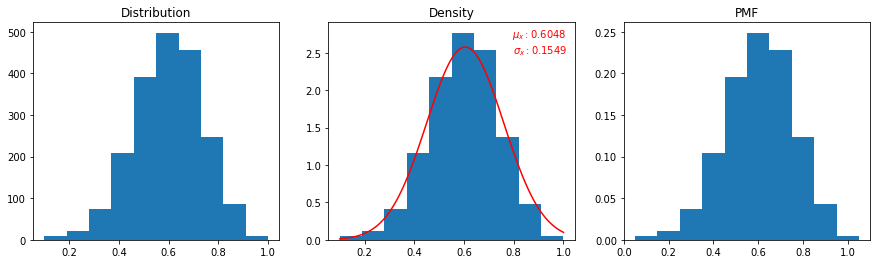

In [74]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

mini_plot_SDSP(Y_mean_list)
plt.show()

### Notations and Conditions

You could already see the resultant sampling distribution shaping up as normal. A visual summary is provided below where, normal distribution approximation is also applied. 

Back to variables, the complicated statistical notation are typically indicated by simpler notations as follows. We used former because we did not want to lose details for sake of simplicity.Now that we have the insight, we could swap with these simpler conventional notations.   

$$
\color {blue}{
\text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}} \\ \\
\mu_\widehat{p} = \mu(\overline{\widehat{Y}}) \\ \\
\sigma_\widehat{p} = \sigma(\overline{\widehat{Y}})
}
$$

Comparing equations set $1$ and $2$, 

$$
\color {blue} {
\mu_\widehat{p} \approx 0.6 = \mu = p \\ \\
\sigma_\widehat{p} \approx 0.1505 \approx \dfrac{0.4898}{\sqrt{10}} = \dfrac {\sigma}{\sqrt{n}} = \sqrt{\dfrac {pq}{n}} \tag {3}
}
$$

>$\widehat{p}$ is called the sample proportion. The resultant sampling distribution could be satisfactorily approximated by normal density function when sample size is sufficiently large. 

**Conditions:**
>How much is sufficiently large? General thumb rule is $np \geq 10$ and $nq \geq 10$ assures a normal distribtuion for sampling distribution.

### Visual Summary

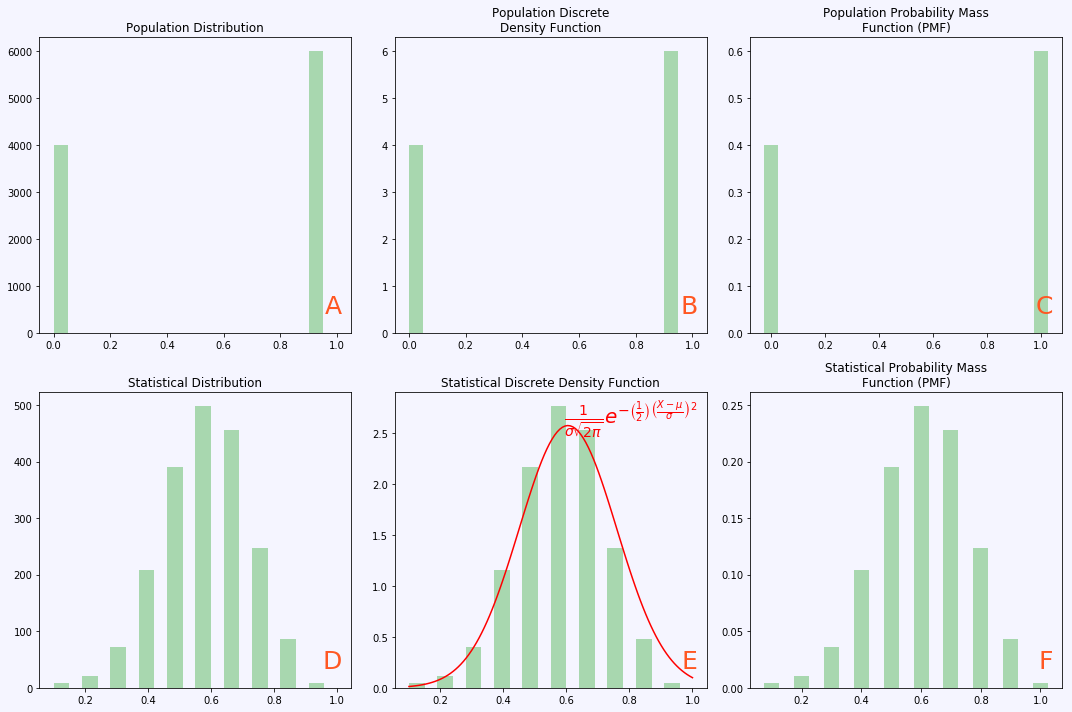

In [75]:
%matplotlib inline
from SDSPSM import plot_SDSP

# PLOT THE RESULTS
from SDSPSM import plot_SDSP, get_normal_curve_label
backgroundColour = '#F5F5FF'
fig, axarr = plt.subplots(2,3, figsize=(15,10), facecolor=backgroundColour)

pop_axarr = [axarr[0,0],axarr[0,1], axarr[0,2]]
titles = ['Population Distribution','Population Discrete\nDensity Function','Population Probability Mass\nFunction (PMF)']
plot_SDSP(population, pop_axarr, titles, index_list=['A','B','C'], norm_off=True)

stat_axarr = [axarr[1,0],axarr[1,1], axarr[1,2]]
titles = ['Statistical Distribution','\nStatistical Discrete Density Function','Statistical Probability Mass\nFunction (PMF)']
plot_SDSP(Y_mean_list, stat_axarr, titles, index_list=['D','E','F'])

plt.tight_layout()
plt.show()

> Note that, normal approximation is best fit not for our discrete probability mass function F, but for Discrete Density Function E. This is because, probability density function has area equal to 1 (total probability is 1), so our discrete function "bars"'s heights should total to 1 as well. This is not possible on our last derived discrete function F, but intermediate density function E.  

## Examples

**Example 1**

The safety officers of a mining company take a Simple Random Survey of $500$ employees and finds that $15\%$, percent of the sampled employees wear contact lenses. The safety officers may take several more samples like this. Suppose it is really $12\%$, percent of the approximately $34,000$ employees in the company who wear contact lenses.  

What are the mean and standard deviation of the sampling distribution of the proportion of employees who wear contact lenses?  [Ref: Khan Academy](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-proportions/e/sampling-distribution-sample-proportion-mean-standard-deviation)  

<u>Ans</u>  

The problem at hand is what proportion wears contact lenses. Our random variable indicates they wear contact lenses or not, thus a Bernoulli one. Its a categorical problem. Thus we deal as sample proportions.  Since in any Bernoulli distribution, $\mu = p$, we proceed as follows. 

Given **True**  population parameters:  $p = \mu = 0.12$  

One Sample result: n=500, $\widehat{p_1} = 0.15$. 

>Note officer may take more like this. So eventually with many experiments of 500 samples, one should arrive at normal distribution (normal assured because $np = 500*0.12 = 60 > 10$)

So resultant normal sampling distribution will have below parameters.  

$$
\mu_\widehat{p} = \mu = 0.12 \\
\sigma_\widehat{p} = \sqrt{\dfrac{pq}{n}} =  \sqrt{\dfrac{0.12(1-0.12)}{500}}
$$

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Typically problems extend further to also calculate probability. But once we know the sampling distribution parameters mean and variance, it is easy to calculate probability of any case next naturally, as we have standard methods to derive probability from normal distributions. Only take care they meet the condition of sample proportion (np > 10 and nq > 10) or  sample means (n>30). Since finding probability from normal distribution is currently not yet covered, we skip that part. What one should be careful is to <b>detect</b> if the question has a sample distribution associated and tackle it accordingly. The same applies to Sample means we see next as well. 
</div><br>

# Sampling Distribution of Sample Means  

This typically applies to case where the variable under study is continuous. For eg, a temperature distribution over a range of values.  

## Temperature

### Setup

**Random:**

Let Y be the random variable indicating temperature over a distribution of certain values.

If limiting values are say, 0 deg C to 40 deg C, our population would thus look like this:
$[23,13,35,50,10,2,5,0,33, \cdots ,21]$

Unlike Sample proportions,we do not know or designate any proportion of temperatures in this example, but we know the mean and variance by simply calculating all values in the distribution. These would be our population parameters.  

Population mean $\mu = \mu_y$  
Population variance $\sigma^2 = \sigma_y^2$  

Since it is a random distribution, there is no theoretical calculation of these values, so we create such a population distribution programmatically, and calculate their parameters.  

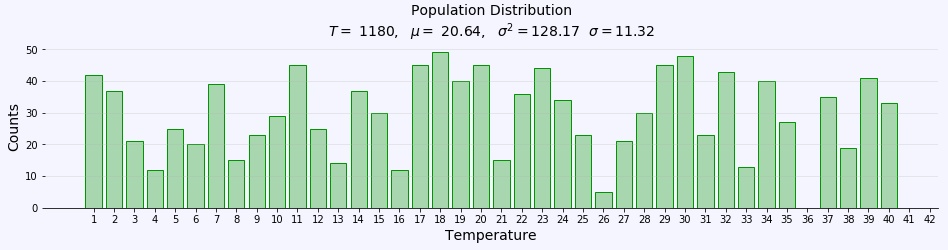

In [76]:
%matplotlib inline
from math import floor
import matplotlib.pyplot as plt
from random import random, seed, shuffle
from SDSPSM import get_metrics, drawBarGraph, getPopulationStatistics

seed(0)

popMin = 1   # Min population
popMax = 40  # Max population
freqMax = 50 # freq of any set of population (for eg, no of occurances of temperatures at 25 deg C)

def createRandomPopulation(N):
    """
    Create a random distribution for N values
    """
    population = []
    population_freq = []
    for i in range(0,N):
        temp_freq = (floor(random() * freqMax))  # random frequency for each population
        temp_list = [i]*temp_freq
        population += temp_list
        population_freq.append(temp_freq)
    shuffle(population)
    return population, population_freq

population, population_freq = createRandomPopulation(popMax - popMin + 1)

#mu, var, sigma = get_metrics(population) # just to cross check..
#print(mu, var, sigma)  

N, mu, var, sigma = getPopulationStatistics(population_freq, popMin)

#visualize
backgroundColour = '#F5F5FF'
fig, (ax1) = plt.subplots(1,1, figsize=(16,3))
drawBarGraph(population_freq, ax1, [N, mu, var, sigma], 'Population Distribution','Temperature', 'Counts')
ax1.set_facecolor(backgroundColour)
fig.patch.set_facecolor(backgroundColour)
plt.show()

From the above graph, we have temperature ranging from 1 deg C to 40 deg C, and each temperature with random frequency. For eg, 4 deg C happens about 10 times indicated by height of bar at Temperature=4 and Counts = 10.  

Summarizing, our population parameters:  

$$
\color {blue}{ \mu = \mu_y = 20.64 \\ \sigma^2 = \sigma_y^2 = 128.17 \\ \sigma = \sigma_y = \sqrt{128.17} = 11.32 } \tag{4}
$$

Let us visualize the density and PMF as usual.. 

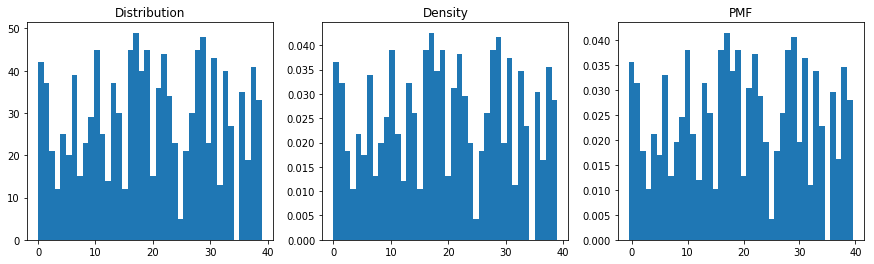

In [77]:
def mini_plot_SDSM(raw_list, bins, width=0.5): 

    ax1.hist(raw_list, bins) 
    ax1.set_title('Distribution')
    
    n, bins,_ = ax2.hist(raw_list, bins, density=True) 
    ax2.set_title('Density')

    # probability mass
    dummy_dict = {i:raw_list.count(i) for i in raw_list}
    total = sum(list(dummy_dict.values()))
    pmf = {key: round(val/total,4) for key, val in dummy_dict.items()}
    ax3.bar(list(pmf.keys()), list(pmf.values()), width=width)
    ax3.set_title('PMF')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSM(population, popMax, width=1)
plt.show()

### Statistical Outcomes: 

>Let us randomly sample from the population. One trial/experiment is sampling about, say $n=10$ samples. Likewise, we sample for many experiments, say $N=2000$. 

<p><span style="background-color: #FFFF00;">Remember: We sample WITH REPLACEMENT</span></p>

>This step is same as we did in Sample proportions case

_Steps:_
* 1.Take a random sample of $n=10$ values from the population. Example sample output: $\widehat{Y_1} = [33,20,40,1,22, \cdots ,37]$ denoting our 1st sample of size $n=10$. **^** just indicates, its a statistical outcome
* 2.Take the mean of it and note down for kth experiment. $\overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki} = \dfrac {1}{10} \sum\limits_{i=1}^{10} Y_{ki}$. Example sample output: $\overline{\widehat{Y_1}} = 11.34$
* 3.Do step 1 and 2 for $N=2000$ times. That is, $N=2000$ experiments $\implies$ $2000$ mean values $\overline{\widehat{Y_k}}$, for $k = 0,1,2,3.... N$  
Example total output:

|$\widehat{Y_k}$|$\overline{\widehat{Y_k}}$|
|---|---|
|1|33.2|
|2|22.1|
|3|20.4|
|4|40.2|
|5|11.3|
|...|...|
|2000|23|

* 4.Take the frequency count of the samples and prepare a concise frequency chart., with each row of mean value against its frequency.  
Example total output:  

|$\overline{\widehat{Y_j}}$|&nbsp; $n(\overline{\widehat{Y_j}})$|
|----|----|
|1| 8|
|2| 23|
|3| 65|
|...|...|
|39| 20|
|40| 5|

* 5.Calculate probability for each row of above table, by simply taking the frequency divided by total outcomes.Note denomitor sums up to 2000 because, statistically we get 1 outcome per experiment (which is a mean), so total no of occurances after 2000 experiments would be 2000 outcomes (2000 means).   
$
p\Big(\overline{\widehat{Y_j}}\Big) = \dfrac {n\Big(\overline{\widehat{Y_j}}\Big)}{\sum n\Big(\overline{\widehat{Y_j}}\Big)} = \dfrac {n\Big(\overline{\widehat{Y_j}}\Big)}{2000} 
$  

|$\overline{\widehat{Y_j}}$|&nbsp; $n(\overline{\widehat{Y_j}})$|&nbsp; $p(\overline{\widehat{Y_j}})$|
|---|---|---|
|1| 8|0.0001|
|2| 23|0.002|
|3| 65|0.034|
|...|...|
|39| 20|0.002|
|40| 5|0.0002|  

>From above table, one could draw the **probability mass function** which is a **discrete probability distribution** where one could find for any $k$, the probability $p(X=k)$ discretly

* 6.Calculate mean, variance and SD as below.Suppose there are total M rows in the table. We would find that,       
$
\mu(\overline{\widehat{Y}}) = \overline{\overline{\widehat{Y}}} = \sum\limits_{j=1}^M \overline{\widehat{Y_j}}p(\overline{\widehat{Y_j}}) \approx \color {blue}{19.69}\\ \\
\sigma(\overline{\widehat{Y}})^2 = \sum\limits_{j=1}^M \Big(\overline{\widehat{Y_j}} - \mu(\overline{\widehat{Y}})\Big)p(\overline{\widehat{Y_j}}) \approx \color {blue}{12.4631}\\ \\
\therefore \ \ \sigma(\overline{\widehat{Y}}) \approx \sqrt{12.4631} = \color {blue}{3.5303}  \tag {5}
$

As usual, its much simpler programmatically

In [78]:
from random import choices 

N = 2000 # No of experiments
n = 10   # Sample size

Y_hat = []
Y_mean_list = []
for each_experiment in range(N):  
    Y_hat = choices(population, k=n)   # sample with replacement
    Y_mean = sum(Y_hat)/len(Y_hat)
#     print(Y_mean)
    Y_mean_list.append(Y_mean)
    
mu, var, sigma = get_metrics(Y_mean_list)
print(mu, var, sigma)

19.6139 13.0506 3.6126


A quick visualization of our resultant statistical outcome ```Y_mean_list```

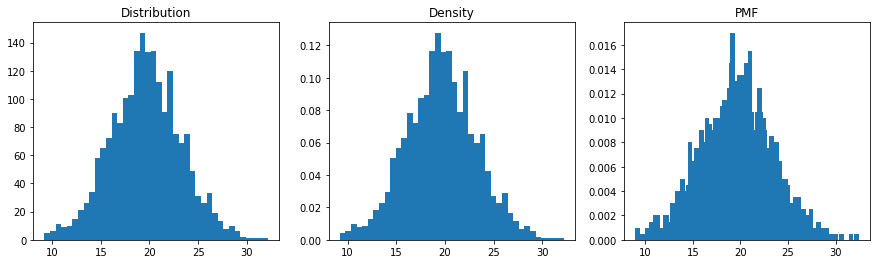

In [79]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

mini_plot_SDSM(Y_mean_list,popMax )
plt.show()

### Notations and Conditions

You could already see the resultant sampling distribution shaping up as normal. A visual summary is provided below where, normal distribution approximation is also applied. 

Back to variables, the complicated statistical notation are typically indicated by simpler notations as follows. We used former because we did not want to lose details for sake of simplicity.Now that we have the insight, we could swap with these simpler conventional notations.   

>Note this is slightly different notation compared to Sample proportions case

$$
\color {blue}{
\mu_\overline{Y} = \mu(\overline{\widehat{Y}}) \\ \\
\sigma_\overline{Y} = \sigma(\overline{\widehat{Y}})
}
$$

Comparing equations set $4$ and $5$, 

$$
\color {blue} {
\mu_\overline{Y} \approx 20.6 = \mu \\ \\
\sigma_\overline{Y} \approx 3.5303 \approx \dfrac{11.32}{\sqrt{10}} = \dfrac {\sigma}{\sqrt{n}}  \tag {3}
}
$$

>$\overline{Y}$ is called the sample means. The resultant sampling distribution could be satisfactorily approximated by normal density function when sample size is sufficiently large. 

**Conditions:**  
>How much is sufficiently large? General thumb rule is $n > 30$. However, if population distribution is already normal, even if n is small, resultant sampling distribution would be normal. 

### Visual Summary

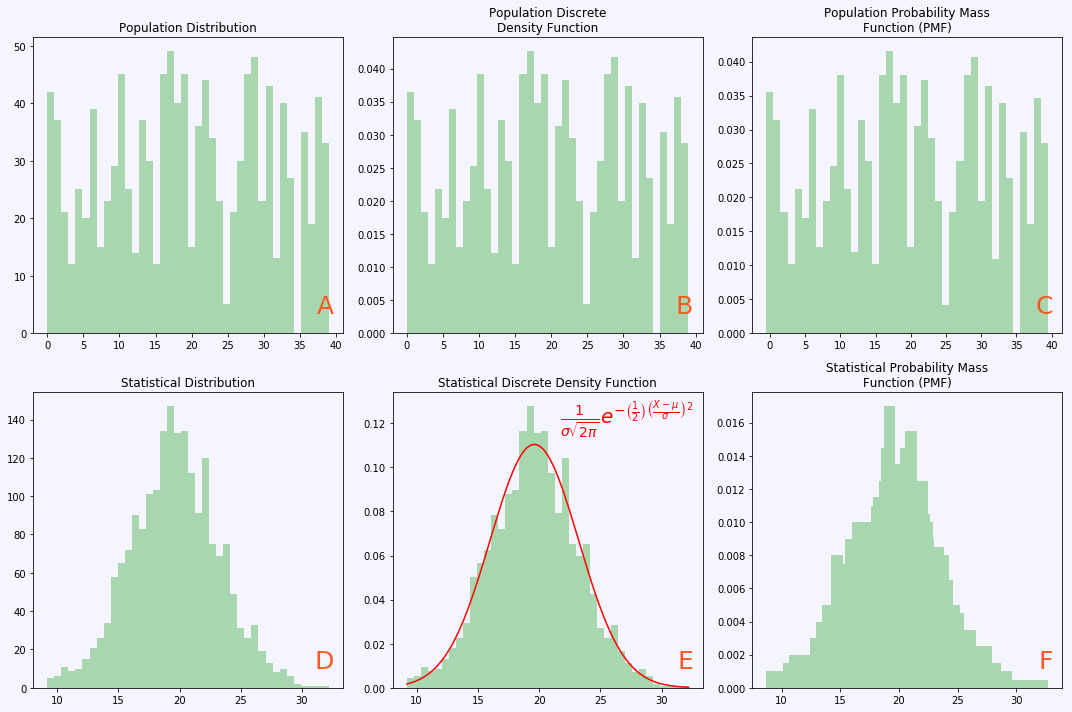

In [80]:
%matplotlib inline
from SDSPSM import plot_SDSM

# PLOT THE RESULTS
from SDSPSM import plot_SDSP, get_normal_curve_label
backgroundColour = '#F5F5FF'
fig, axarr = plt.subplots(2,3, figsize=(15,10), facecolor=backgroundColour)

pop_axarr = [axarr[0,0],axarr[0,1], axarr[0,2]]
titles = ['Population Distribution','Population Discrete\nDensity Function','Population Probability Mass\nFunction (PMF)']
plot_SDSM(population, popMax, pop_axarr, titles, index_list=['A','B','C'], norm_off=True)

stat_axarr = [axarr[1,0],axarr[1,1], axarr[1,2]]
titles = ['Statistical Distribution','\nStatistical Discrete Density Function','Statistical Probability Mass\nFunction (PMF)']
plot_SDSM(Y_mean_list, popMax, stat_axarr, titles, index_list=['D','E','F'])

plt.tight_layout()
plt.show()

> Again recall that, normal approximation is best fit not for our discrete probability mass function F, but for Discrete Density Function E. This is because, probability density function has area equal to 1 (total probability is 1), so our discrete function "bars"'s heights should total to 1 as well. This is not possible on our last derived discrete function F, but intermediate density function E.  

## Examples

**Example 1:**  

A machine automatically dispenses a beverage of a desired size. When set to **small**, the machine dispenses varying amounts of liquid with a mean of $275mL$, space, m, L and standard deviation of $10mL$. Suppose that we take random samples of 5 of these drinks and calculate the mean amount of liquid $\bar{x}$  in each sample. We can assume that individual drinks are independent.  

Calculate the mean and standard deviation of the sampling distribution of $\bar{x}$  

<u>Ans:</u>
The problem at hand is about varying amounts of liquid - this is a _continuous random distribution_.Thus we deal as sample means.  

**True** population parameters: $\mu = 275\ mL \ \ \ \sigma=10\ mL$
Sample Size = 5

$\therefore$
$$
\mu_{\overline{Y}} \approx \mu = 275 \ mL\\
\sigma_{\overline{Y}} \approx \dfrac {\sigma}{\sqrt{n}} = \dfrac {10}{\sqrt{5}} = 4.47 \ mL
$$

# Summary

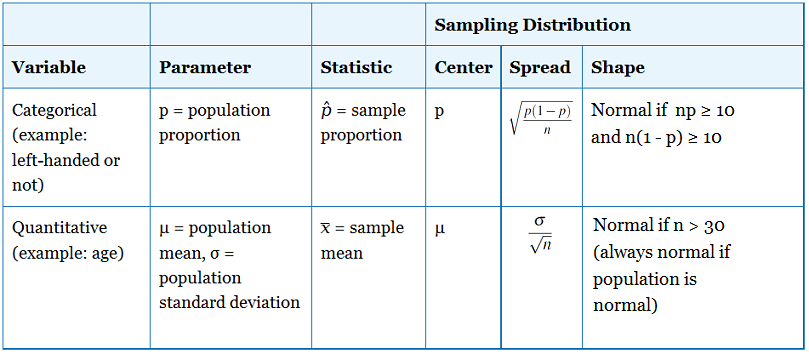

# Wish to do

1. Theoretical Derivation for both Sample proportions and Sample means. [blocking point](https://math.stackexchange.com/questions/2878417/how-sample-mean-equals-population-mean/2879037?noredirect=1#comment5944891_2879037)
2. Visualization for Conditions for Sample proportions and Sample means. [blocking point](https://math.stackexchange.com/questions/2881045/why-sampling-distribution-not-skewed-when-np-10-and-nq-10?noredirect=1#comment5948209_2881045)